In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## combine all the months data into one dataframe

In [3]:
import os
 
folder_path = "C:\\Users\\LENOVO\\Desktop\\Sales_Data"
    
# List to store individual DataFrames
dfs = []

# Loop through each file in the directory
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Read the CSV file and append it to the list
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        dfs.append(df)

# Concatenate all DataFrames in the list
combined_df = pd.concat(dfs, ignore_index=True)



In [4]:
df = pd.DataFrame(combined_df)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## data preprocessing

In [6]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [9]:
a = df['Quantity Ordered'] == 'Quantity Ordered'

In [10]:
b = df.loc[a, :].index

In [11]:
df.drop(b, inplace = True)

In [12]:
df[['Quantity Ordered', 'Price Each']] = df[['Quantity Ordered', 'Price Each']].astype(float)

In [13]:
df['Order ID'] = df['Order ID'].astype(int)

In [14]:
df.dtypes

Order ID              int32
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [16]:
df.dtypes

Order ID                     int32
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [17]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


## data analysis

## Q1: what was the best month for sales? and how much money was earned that month?

## we will make a separate column for the total amount

In [21]:
df['total amount'] = df['Quantity Ordered'] * df['Price Each']

## we will extract the month name from the date in the separate column

In [23]:
df['month'] = df['Order Date'].dt.strftime('%B')

In [24]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total amount,month
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,April
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,April


In [25]:
gmonth = df.groupby('month')

<Axes: xlabel='month'>

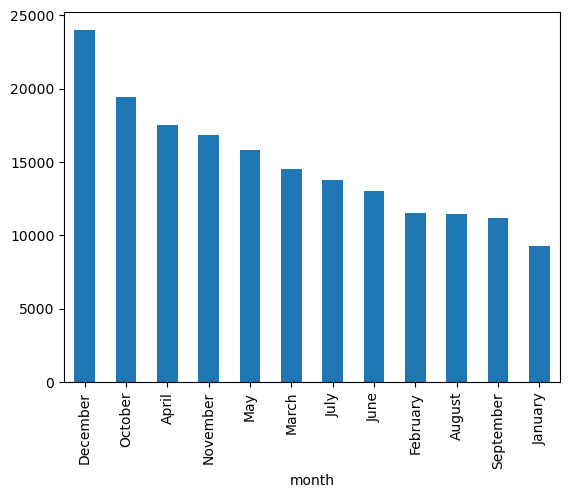

In [26]:
gmonth['Order ID'].nunique().sort_values(ascending = False).plot(kind = 'bar')

## from the above graph we can see that highest number of orders were placed during december

In [28]:
dec = df['month'] == 'December'

In [29]:
print("the total amount made during the month of December were:")
df.loc[dec, ['total amount']].sum()

the total amount made during the month of December were:


total amount    4613443.34
dtype: float64

## what city has the highest number of sales?

## we will make a separate column for cities

In [32]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())

In [33]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,total amount,month,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,April,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,April,Boston


In [34]:
gcity = df.groupby('City')

<Axes: xlabel='City'>

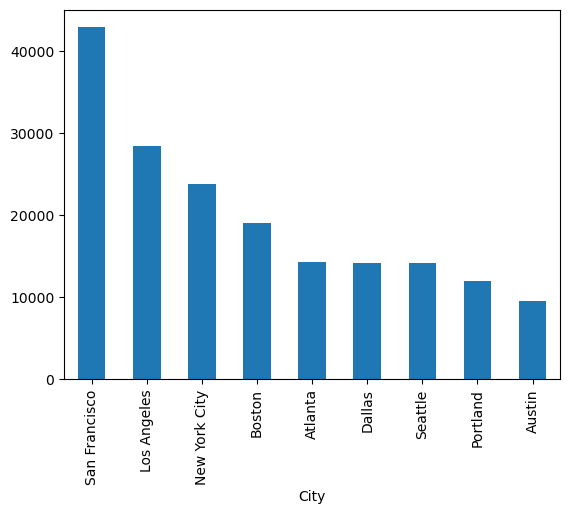

In [35]:
gcity['Order ID'].nunique().sort_values(ascending= False).plot(kind = 'bar')

## from the above graph we can see that San Francisco had the highest number of customers

In [37]:
sf = df['City'] == 'San Francisco'

## now we will see how much amount San Francisco made 

In [39]:
df.loc[sf, 'total amount'].sum().round(2)

8262203.91

## what time should we display advertisements to maximize the likehood of customer buying products?

## we will add a separate column for the hour

In [42]:
df['Hour'] = df['Order Date'].dt.strftime('%H')

In [43]:
ghour = df.groupby('Hour')

Text(0.5, 1.0, 'customer arrival during each hour')

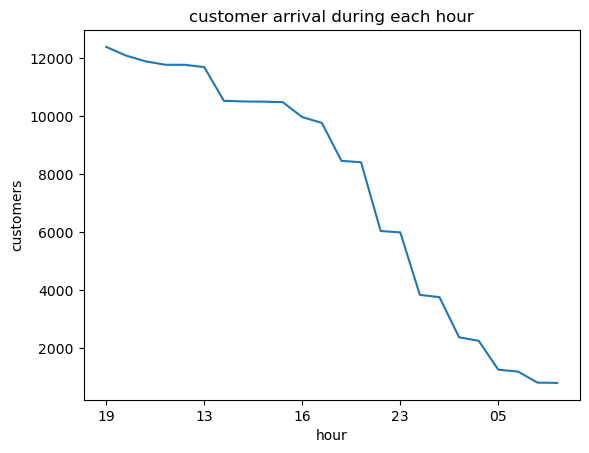

In [44]:
ghour['Order ID'].nunique().sort_values(ascending = False).plot(kind = 'line')
plt.xlabel('hour')
plt.ylabel('customers')
plt.title("customer arrival during each hour")

In [45]:
ghour['Order ID'].nunique().sort_values(ascending = False).head(3)

Hour
19    12377
12    12082
11    11882
Name: Order ID, dtype: int64

## as we can see from the above graph that highest number of customers came at 7 pm

In [47]:
seven = df['Hour'] = '7'

## what products are often sold together?

In [89]:
from itertools import combinations

grouped = df.groupby('Order ID')['Product'].apply(list)

product_pairs = {}

for products in grouped:
    pairs = list(combinations(products, 2))
    for pair in pairs:
        if pair in product_pairs:
            product_pairs[pair] += 1
        else:
            product_pairs[pair] = 1

sorted_pairs = sorted(product_pairs.items(), key=lambda x: x[1], reverse=True)

for pair, frequency in sorted_pairs[:10]:
    print(f"Products: {pair}, Frequency: {frequency}")


Products: ('iPhone', 'Lightning Charging Cable'), Frequency: 1005
Products: ('Google Phone', 'USB-C Charging Cable'), Frequency: 987
Products: ('iPhone', 'Wired Headphones'), Frequency: 447
Products: ('Google Phone', 'Wired Headphones'), Frequency: 414
Products: ('Vareebadd Phone', 'USB-C Charging Cable'), Frequency: 361
Products: ('iPhone', 'Apple Airpods Headphones'), Frequency: 360
Products: ('Google Phone', 'Bose SoundSport Headphones'), Frequency: 220
Products: ('USB-C Charging Cable', 'Wired Headphones'), Frequency: 160
Products: ('Vareebadd Phone', 'Wired Headphones'), Frequency: 143
Products: ('Lightning Charging Cable', 'Wired Headphones'), Frequency: 92


## which product was sold the most?

In [81]:
gproduct = df.groupby('Product')

<Axes: xlabel='Product'>

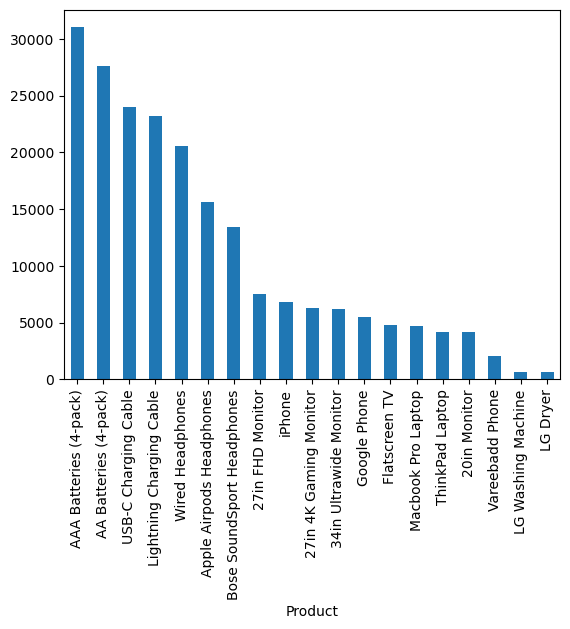

In [85]:
gproduct['Quantity Ordered'].sum().sort_values(ascending = False).plot(kind = 'bar')

## here we can see that AAA Batteries (4-pack) was sold the most

# Insights Extracted:
1. Total Amount Made in December: The total amount made during the month of December was $4,613,443.34.

2. Total Amount Made in San Francisco: The total money made in San Francisco is $8,262,203.91.

3. Peak Time for Customers: The highest number of customers came at 7 PM.

4. Frequently Sold Together Products:
    - ('iPhone', 'Lightning Charging Cable'): 1005 times
    - ('Google Phone', 'USB-C Charging Cable'): 987 times
    - ('iPhone', 'Wired Headphones'): 447 times
    - ('Google Phone', 'Wired Headphones'): 414 times
    - ('Vareebadd Phone', 'USB-C Charging Cable'): 361 times
    - ('iPhone', 'Apple Airpods Headphones'): 360 times
    - ('Google Phone', 'Bose SoundSport Headphones'): 220 times
    - ('USB-C Charging Cable', 'Wired Headphones'): 160 times
    - ('Vareebadd Phone', 'Wired Headphones'): 143 times
    - ('Lightning Charging Cable', 'Wired Headphones'): 92 times

5. Most Sold Product: AAA Batteries (4-pack) was sold the most.

### Conclusion:
- December was a profitable month, with total earnings of over $4.6 million.
- San Francisco was the highest revenue-generating city, contributing over $8.2 million.
- 7 PM was the peak time for customers, indicating potential opportunities for targeted marketing or promotions during this time.
- The analysis of frequently sold together products provides insights into potential product bundles or cross-selling opportunities. For instance, items like iPhones and their compatible accessories (charging cables, headphones) are frequently purchased together, suggesting the possibility of bundling these items for promotions.
- AAA Batteries (4-pack) emerged as the best-selling product, indicating its popularity among customers. This could be due to its practical use and affordability, making it a staple item for many customers.